In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, os
data = "114_congress_senate.csv"
votes = pd.read_csv(os.path.relpath("Data\\"+data))
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [2]:
# Check party affliation
print(votes.party.value_counts())

#Check mean for each vote
print(votes.mean())

R    54
D    44
I     2
Name: party, dtype: int64
00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64


<h3>Euclidian Distance</h3>
<p>One way of determining the "closeness" of entities is by calculating <a href="https://en.wikipedia.org/wiki/Euclidean_distance">Euclidian Distance </a> between them</p>
<p>Formula:</p>
<p>$d = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2}$</p>
<p>In other terms, for two points, $p,q$ in Euclidean n-space, the Euclidean distance gives the straight-line distance between those two points given their position in n-space coordinates.</p>
<p>$\sum_{i=0}^{n}(q_i-p_i)^2$</p>
<p>In Python, we can use the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html">euclidean_distances()</a> method from scikit-learn.metrics.pairwise</p> 
<p>The scikit-learn method computes distance as ````dist(x, y) = sqrt(dot(x, x) - 2 * dot(x, y) + dot(y, y))```` for efficiency reasons</p>
<p>This method of computation follows from the geometric reasoning:</p>
<p>The distance $d$ between two points $a$ and $b$ on an xy-plane is the square of the sum of the differences of the x coordinates and y coordinates</p>
<p>Let $a$ have the coordinate pair $(x_a,y_a)$, and $b$ the pair $(x_b,y_b)$</p>
<p>Let $x'=x_a-x_b$, the separating distance on the x-axis, and $y'=y_a-y_b$ on the y-axis</p>
<p>So, $d=((x_a-x_b)+(y_a-y_b))^2=(x'+y')^2$, which by the binomial theorem gives $x'^2-2x'y'+y'^2$</p> 
<p>Which is equivalent to $x'\bullet x' - 2x'\bullet y'+y' \bullet y'$</p>



In [3]:
# import euclidean_distances
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

# Aside--using np.reshape: (for pd series Series.values.reshape())

# use np.reshape to using -1 in the tuple to infer the rest of the shape of the reshape

a = np.array([[1,2,3],[4,5,6]])
print("Array:")
print(a)
print("Reshaped:")
print(np.reshape(a,(1,6)))
print("Reshaped to 3x2 using -1 tuple element:")
print(np.reshape(a,(3,-1)))


Array:
[[1 2 3]
 [4 5 6]]
Reshaped:
[[1 2 3 4 5 6]]
Reshaped to 3x2 using -1 tuple element:
[[1 2]
 [3 4]
 [5 6]]


In [4]:
# find distance between rows 2 and 10:
# Use .iloc[row,columns] to select only numberic columns

distance = euclidean_distances(votes.iloc[1,3:].values.reshape(1,-1), votes.iloc[9,3:].values.reshape(1,-1))

print(distance)

[[ 2.6925824]]


<h3>K-means</h3>
<p><a href="https://en.wikipedia.org/wiki/K-means_clustering">K-means clustering</a> is a method of partitioning data into k-clusters defined (arbitrarily). Because it is a clustering algorithm, it is both unsupervised and non-predictive. This is a data mining technique rather than a predictive technique.</p>
<p>scikit-learn provides a <a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">k-means</a> class to perform this clustering.</p>
<p>Initializing a k-means model:</p>
<p>````kmeans_model = KMeans(n_clusters=2, random_state=1)````</p>
<p>Defining the random state allows the algorithm to be reproduced</p>
<p>Then we can use the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit_transform">fit_transform()</a> method to model the distance from each observation to each cluster. This produces a k x n array with k columns and n rows, where n is the number of observations.</p>

In [5]:
# Import KMeans

from sklearn.cluster import KMeans

# Instantiate KMeans class
kmeans_model = KMeans(n_clusters=2, random_state=1)

# Fit model on data:
senator_distances = kmeans_model.fit_transform(votes.iloc[:,3:])

print(senator_distances[:10,:])


[[ 3.12141628  1.3134775 ]
 [ 2.6146248   2.05339992]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 1.43833966  2.96866004]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 0.31287498  3.30758755]]


In [6]:
# Now using crosstab, see whether our expectation that setting 2 clusters for republicans and dems reflects party preference

# extract cluster labels from kmeans_model using .labels_ method
labels = kmeans_model.labels_

# print crosstab
print(pd.crosstab(labels, votes["party"]))


party   D  I   R
row_0           
0      41  2   0
1       3  0  54


In [7]:
# Sup with those dems voting with republicans??

# Subset DataFrame to those senators

democratic_outliers = votes[(labels == 1) & (votes["party"]=="D")] 

democratic_outliers.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


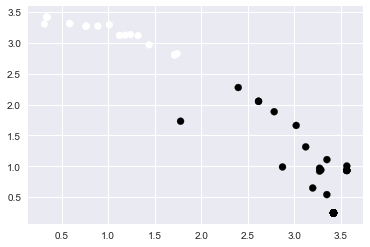

In [8]:
# Let's plot them clusters!!

%matplotlib inline

plt.scatter(x=senator_distances[:,0], y=senator_distances[:,1], c=labels)
plt.show()

In [9]:
# Let's try it with bokeh
from ipywidgets import interact
from bokeh.io import push_notebook, output_notebook, show 
from bokeh.plotting import figure
from bokeh.models import HoverTool
from bokeh.models.sources import ColumnDataSource
output_notebook()

source_df = votes
source_df["Cluster 1 dist"] = senator_distances[:,0]
source_df["Cluster 2 dist"] = senator_distances[:,1]
source = ColumnDataSource(source_df)

hover = HoverTool(tooltips=[("name","@name"),("party","@party")])



p = figure(title="Senate K-Means Clusters", tools=[hover])
p.circle(x='Cluster 1 dist', y="Cluster 2 dist", source=source)

show(p)




Loading BokehJS ...

In [10]:
votes["party"].iloc[5]

'D'

In [11]:
# Root out the extremists! (See Dataquest for explanation)

import numpy as np
extremism = (senator_distances**3).sum(axis =1)
votes["extremism"] = extremism

votes.sort_values('extremism', inplace=True, ascending=False)

print(votes[["name","party","extremism"]][:50])
votes.head()

         name party  extremism
98     Wicker     R  46.250476
53   Lankford     R  46.046873
69       Paul     R  46.046873
80      Sasse     R  46.046873
26       Cruz     R  46.046873
48    Johnson     R  40.017540
47    Isakson     R  40.017540
65  Murkowski     R  40.017540
64      Moran     R  40.017540
30       Enzi     R  40.017540
31      Ernst     R  40.017540
33    Fischer     R  40.017540
34      Flake     R  40.017540
60  McConnell     R  40.017540
92     Toomey     R  40.017540
86     Shelby     R  40.017540
39   Grassley     R  40.017540
88   Sullivan     R  40.017540
25      Crapo     R  40.017540
90      Thune     R  40.017540
84   Sessions     R  40.017540
58     McCain     R  40.017540
45     Hoeven     R  40.017540
46     Inhofe     R  40.017540
91     Tillis     R  40.017540
40      Hatch     R  40.017540
24     Cotton     R  40.017540
17    Cassidy     R  40.017540
3    Barrasso     R  40.017540
77     Rounds     R  40.017540
6       Blunt     R  40.017540
76    Ro

,name,party,state,00001,00004,00005,00006,00007,00008,00009,...,00020,00026,00032,00038,00039,00044,00047,Cluster 1 dist,Cluster 2 dist,extremism
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.563247,1.002958,46.250476
53,Lankford,R,OK,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.563247,0.930362,46.046873
69,Paul,R,KY,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.563247,0.930362,46.046873
80,Sasse,R,NE,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.563247,0.930362,46.046873
26,Cruz,R,TX,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.563247,0.930362,46.046873
